# prepare dataset and import libraries

In [ ]:
!pip install ax-platform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ax import optimize, ParameterType

In [ ]:
import pandas as pd
data = pd.read_csv('WIC_default_freq_V3_emb.csv')

In [ ]:
data.head()

,Unnamed: 0,keyword,POS,indices,sentence1,sentence2,human_label,freq,log2freq,default2,emb1,emb2
0,0,carry,V,2-1,You must carry your camping gear .,Sound carries well over water .,F,51781,15.660135,F,"[0.36855340003967285, 0.21410489082336426, 0.3...","[0.7610353827476501, 0.24949008226394653, 0.42..."
1,1,go,V,2-6,Messages must go through diplomatic channels .,Do you think the sofa will go through the door ?,F,1425686,20.443225,T,"[-0.0852346196770668, -0.13542714715003967, 0....","[-0.41432949900627136, -0.5187293291091919, -0..."
2,2,break,V,0-2,Break an alibi .,The wholesaler broke the container loads into ...,F,92773,16.501417,F,"[-0.09557104855775833, 0.6806768774986267, -0....","[0.6646726131439209, 0.3640071749687195, -0.33..."
3,3,cup,N,8-4,He wore a jock strap with a metal cup .,Bees filled the waxen cups with honey .,T,59218,15.853748,T,"[0.04534776136279106, 0.15553200244903564, -0....","[0.5837751626968384, 0.7275094985961914, 0.373..."
4,4,academy,N,1-2,The Academy of Music .,The French Academy .,F,8268,13.013323,T,"[0.6533669233322144, 0.41288065910339355, 0.14...","[0.38001948595046997, 0.5047792196273804, -0.5..."


In [ ]:
data2 = pd.read_csv('WIC_default_freq_V1.csv')

In [ ]:
data2

,Unnamed: 0,index,keyword,POS,indices,sentence1,sentence2,human_label,default,freq,log2freq
0,0,0,carry,V,2-1,You must carry your camping gear .,Sound carries well over water .,F,F,51781,15.660135
1,1,1,go,V,2-6,Messages must go through diplomatic channels .,Do you think the sofa will go through the door ?,F,T,1425686,20.443225
2,2,2,break,V,0-2,Break an alibi .,The wholesaler broke the container loads into ...,F,F,92773,16.501417
3,3,3,cup,N,8-4,He wore a jock strap with a metal cup .,Bees filled the waxen cups with honey .,T,T,59218,15.853748
4,4,4,academy,N,1-2,The Academy of Music .,The French Academy .,F,T,8268,13.013323
...,...,...,...,...,...,...,...,...,...,...,...
5409,5409,5423,krona,N,4-8,Piecas kronas — five krona .,Kronas kurss — the exchange rate of the krona .,T,T,20,4.321928
5410,5410,5424,conflict,N,3-1,The harder the conflict the more glorious the ...,The conflict between the government and the re...,T,T,6941,12.760928
5411,5411,5425,answer,V,0-0,Answer the riddle .,Answer a question .,T,T,92806,16.501930
5412,5412,5426,play,V,0-0,Play the casinos in Trouville .,Play the races .,T,T,242591,17.888167


In [ ]:
!pip install pytorch_pretrained_bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 33.6 MB/s 
     |████████████████████████████████| 596 kB 60.5 MB/s 
     |████████████████████████████████| 101 kB 12.7 MB/s 
     |████████████████████████████████| 6.6 MB 60.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# Load pre-trained model (weights)

model = BertModel.from_pretrained('bert-base-uncased').to('cuda')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

100%|██████████| 407873900/407873900 [00:34<00:00, 11766364.60B/s]


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import math
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import tagset_mapping, map_tag
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
from sklearn.decomposition import PCA
import random
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
# function to create word embedding given text and a terget index
def emb(text, target_index):
    tokens = text.lower().split(' ')
    tokenized_words = []
    emb_index = []
    tokenized_words.append('[CLS]')
    for word_sim in tokens:
        len_now = 0
        for tokenized in tokenizer.tokenize(word_sim):
            len_now+=1
            tokenized_words.append(tokenized)
        emb_index.append([len(tokenized_words) -1 - i for i in range(len_now)])
    tokenized_words.append('[SEP]')
    #print(tokenized_words) #########################################################
    #print(emb_index) #########################################################
    
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_words)
    # Mark each of the 22 tokens as belonging to sentence "1".
    segments_ids = [1] * len(tokenized_words)
    # Convert inputs to PyTorch tensors
    
    tokens_tensor = torch.tensor([indexed_tokens]).to('cuda')
    segments_tensors = torch.tensor([segments_ids]).to('cuda')
    #tokens_tensor = torch.tensor([indexed_tokens])
    #segments_tensors = torch.tensor([segments_ids])
    with torch.no_grad():
        encoded_layers, _ = model(tokens_tensor, segments_tensors)
    return sum([encoded_layers[11][0][temp_index].to('cpu') for temp_index in emb_index[target_index]])/len(emb_index[target_index])

In [ ]:
# function to calculate overall accuracy given a cosine similarity threshold
def acc(threshold):
  score = 0
  for index in range(len(data)):
      emb1 = torch.tensor([float(i) for i in data.iloc[index]['emb1'][1:-2].split(',')])
      emb2 = torch.tensor([float(i) for i in data.iloc[index]['emb2'][1:-2].split(',')])
      cos = torch.cosine_similarity(emb1.reshape(1,-1), emb2.reshape(1,-1))[0].item()
      if cos >= threshold:
          temp = 'T'
      else:
          temp = 'F'
      if temp == data.iloc[index]['human_label']:
          score+=1
  return score/len(data)

In [ ]:
acc(0.5)

0.6861839674916882

In [ ]:
acc(0.5458398704995235)

0.6930181012190617

In [ ]:
acc(0.5447465400847086)

0.6935722201699298

In [ ]:
acc(0.25)

0.5024011821204285

In [ ]:
acc(0.75)

0.5797931289250092

# cosine similarity threshold optimization

In [ ]:
# optimize for the best cosine similarity threshold
best_parameters, best_values, experiment, model2 = optimize(
        parameters=[
          {
            "name": "x1",
            "type": "range",
            "bounds": [0.1, 0.9],
          },
        ],
        # Booth function
        evaluation_function=lambda p: acc(p['x1']),
        minimize=False,
    )

[INFO 08-09 02:58:53] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 08-09 02:58:53] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='x1', parameter_type=FLOAT, range=[0.0, 1.0])], parameter_constraints=[]).
[INFO 08-09 02:58:53] ax.modelbridge.dispatch_utils: Using Bayesian optimization since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO 08-09 02:58:53] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 08-09 02:58:53] ax.service.managed_loop: Started full optimization with 20 steps.
[INFO 08-09 0

In [ ]:
best_parameters

{'x1': 0.5447465400847086}

In [ ]:
best_parameters['x1']

0.5447465400847086

In [ ]:
best_values

({'objective': 0.6922492425180468},
 {'objective': {'objective': 2.810795427259783e-07}})

In [ ]:
score=0
for index in range(len(data2)):
    if data2.iloc[index]['human_label'] == default2[index]:
        score+=1
print(score/len(data2))

0.6935722201699298


In [ ]:
score=0
for index in range(len(data)):
    if data.iloc[index]['human_label'] == data.iloc[index]['default2']:
        score+=1
print(score/len(data))

0.6859992611747322


In [ ]:
data['default2']=pd.Series(default2)
score=0
for index in range(len(data)):
    if data.iloc[index]['human_label'] == data.iloc[index]['default2']:
        score+=1
print(score/len(data))

0.6935722201699298


In [ ]:
data.to_csv('WIC_default_V4_emb.csv')

In [ ]:
import joblib
record = joblib.load('freqDictAutoSaveV4')

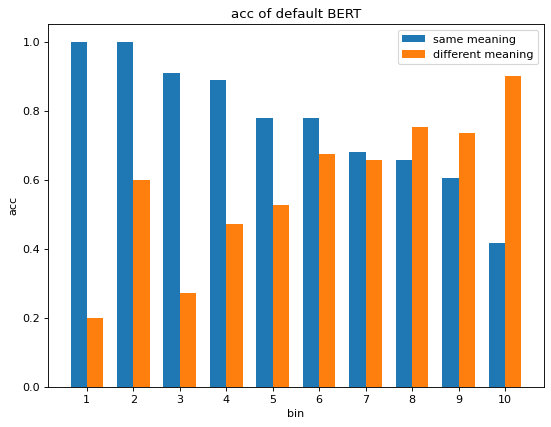

In [ ]:
# display the baseline results
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#freq = [np.log2(i[1][0]) for i in sorted(record.items(), key=lambda x:-x[1][0]) if i[0][2]=='NON_STOP' and i[0][1] in ['NOUN','VERB']]
no_bin = 10
move = np.log2(4000000)/no_bin
x=[j for j in range(1,11)]
y_sim=[]
y_dissim=[]
for index in range(no_bin):
    left = index*move
    if index == no_bin-1:
        right = np.log2(4000000)+1
    else:
        right = (index+1)*move
    F = data[(data['human_label'] == 'F') & (data['log2freq']>= left) & (data['log2freq']< right)]
    T = data[(data['human_label'] == 'T') & (data['log2freq']>= left) & (data['log2freq']< right)]
    F_F = F[F['default2']=='F']
    T_T = T[T['default2']=='T']
    y_dissim.append(len(F_F)/len(F))
    y_sim.append(len(T_T)/len(T))
    #print(len(T), len(T_T))

figure(figsize=(8, 6), dpi=80)
N = 10
#men_means = (20, 35, 30, 35, 27)
#women_means = (25, 32, 34, 20, 25)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, y_sim, width, label='same meaning')
plt.bar(ind + width, y_dissim, width,
    label='different meaning')

plt.ylabel('acc')
plt.xlabel('bin')
plt.title('acc of default BERT')

plt.xticks(ind + width / 2, x)
plt.legend(loc='best')
plt.show()

In [ ]:
data2=data.drop('default', axis = 1)
data2.head()


,Unnamed: 0,index,keyword,POS,indices,sentence1,sentence2,human_label,freq,log2freq,default2
0,0,0,carry,V,2-1,You must carry your camping gear .,Sound carries well over water .,F,51781,15.660135,F
1,1,1,go,V,2-6,Messages must go through diplomatic channels .,Do you think the sofa will go through the door ?,F,1425686,20.443225,T
2,2,2,break,V,0-2,Break an alibi .,The wholesaler broke the container loads into ...,F,92773,16.501417,F
3,3,3,cup,N,8-4,He wore a jock strap with a metal cup .,Bees filled the waxen cups with honey .,T,59218,15.853748,T
4,4,4,academy,N,1-2,The Academy of Music .,The French Academy .,F,8268,13.013323,T


In [ ]:
data2.to_csv('WIC_default_freq_V2_thres.csv')